# ПРАКТИЧЕСКАЯ РАБОТА 9. ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ
Котляров Денис Владимирович
ПИН-б-о-22-1 09.03.03 Прикладная информатика

Цель лабораторной работы: изучение программных средств для организации
рабочего места специалиста по анализу данных и машинному обучению.
Основные задачи:
– получение программного доступа к данным, содержащимся в источниках
различного типа;
– выполнение предварительного анализа данных и получение обобщенных
характеристик наборов данных;
– исследование простых методов визуализации данных;
– изучение основных библиотек Python для работы с данными.




In [1]:
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt


Для работы был использован датасет «Wine recognition data»
Эти данные являются результатом химического анализа вин, выращенных в одном и том же регионе в Италии, но полученных от трех разных культурных сортов винограда. Анализ определил количество 13 составляющих обнаруженных в каждом из трех типов вин.


In [2]:
data = np.genfromtxt("wine.data", delimiter=",")

In [3]:
print(data)

[[1.000e+00 1.423e+01 1.710e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.000e+00 1.320e+01 1.780e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.000e+00 1.316e+01 2.360e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [3.000e+00 1.327e+01 4.280e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [3.000e+00 1.317e+01 2.590e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [3.000e+00 1.413e+01 4.100e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [4]:
print("Data type : ", type(data))
print("Data shape : ", data.shape )
print(data[:10])

Data type :  <class 'numpy.ndarray'>
Data shape :  (178, 14)
[[1.000e+00 1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00
  3.060e+00 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.000e+00 1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00
  2.760e+00 2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.000e+00 1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00
  3.240e+00 3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.000e+00 1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00
  3.490e+00 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.000e+00 1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00
  2.690e+00 3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]
 [1.000e+00 1.420e+01 1.760e+00 2.450e+00 1.520e+01 1.120e+02 3.270e+00
  3.390e+00 3.400e-01 1.970e+00 6.750e+00 1.050e+00 2.850e+00 1.450e+03]
 [1.000e+00 1.439e+01 1.870e+00 2.450e+00 1.460e+01 9.600e+01 2.500e+

Выводим тип данных, размер, и первые 10 элементов датасета
Тип данных стандартный(по умолчанию) для numpy
Размерность датасета составляет 178 строк и 14 столбцов 
Так как мы не задали тип данных для считываемых значений из файла, данные отображаются в неудобном формате


In [5]:
data2 = np.genfromtxt('wine.data', delimiter=",", dtype=None)

In [6]:
print(data2.shape)
print(type(data2))
print(type(data2[0]))
print(type(data2[0][4]))
print(data2[:10])

(178,)
<class 'numpy.ndarray'>
<class 'numpy.void'>
<class 'numpy.float64'>
[(1, 14.23, 1.71, 2.43, 15.6, 127, 2.8 , 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065)
 (1, 13.2 , 1.78, 2.14, 11.2, 100, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4 , 1050)
 (1, 13.16, 2.36, 2.67, 18.6, 101, 2.8 , 3.24, 0.3 , 2.81, 5.68, 1.03, 3.17, 1185)
 (1, 14.37, 1.95, 2.5 , 16.8, 113, 3.85, 3.49, 0.24, 2.18, 7.8 , 0.86, 3.45, 1480)
 (1, 13.24, 2.59, 2.87, 21. , 118, 2.8 , 2.69, 0.39, 1.82, 4.32, 1.04, 2.93,  735)
 (1, 14.2 , 1.76, 2.45, 15.2, 112, 3.27, 3.39, 0.34, 1.97, 6.75, 1.05, 2.85, 1450)
 (1, 14.39, 1.87, 2.45, 14.6,  96, 2.5 , 2.52, 0.3 , 1.98, 5.25, 1.02, 3.58, 1290)
 (1, 14.06, 2.15, 2.61, 17.6, 121, 2.6 , 2.51, 0.31, 1.25, 5.05, 1.06, 3.58, 1295)
 (1, 14.83, 1.64, 2.17, 14. ,  97, 2.8 , 2.98, 0.29, 1.98, 5.2 , 1.08, 2.85, 1045)
 (1, 13.86, 1.35, 2.27, 16. ,  98, 2.98, 3.15, 0.22, 1.85, 7.22, 1.01, 3.55, 1045)]


Теперь значения выводятся в понятной форме
Но можно и вручную задать необходимые типы данных для каждого столбца


In [8]:
dt0 = ("i4,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8")

In [9]:
data1 = np.genfromtxt('wine.data', delimiter=",", dtype=dt0)

In [11]:
print(data1.shape)
print(type(data1))
print(type(data1[0]))
print(type(data1[0][4]))
print(data1[:10])

(178,)
<class 'numpy.ndarray'>
<class 'numpy.void'>
<class 'numpy.float64'>
[(1, 14.23, 1.71, 2.43, 15.6, 127., 2.8 , 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.)
 (1, 13.2 , 1.78, 2.14, 11.2, 100., 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4 , 1050.)
 (1, 13.16, 2.36, 2.67, 18.6, 101., 2.8 , 3.24, 0.3 , 2.81, 5.68, 1.03, 3.17, 1185.)
 (1, 14.37, 1.95, 2.5 , 16.8, 113., 3.85, 3.49, 0.24, 2.18, 7.8 , 0.86, 3.45, 1480.)
 (1, 13.24, 2.59, 2.87, 21. , 118., 2.8 , 2.69, 0.39, 1.82, 4.32, 1.04, 2.93,  735.)
 (1, 14.2 , 1.76, 2.45, 15.2, 112., 3.27, 3.39, 0.34, 1.97, 6.75, 1.05, 2.85, 1450.)
 (1, 14.39, 1.87, 2.45, 14.6,  96., 2.5 , 2.52, 0.3 , 1.98, 5.25, 1.02, 3.58, 1290.)
 (1, 14.06, 2.15, 2.61, 17.6, 121., 2.6 , 2.51, 0.31, 1.25, 5.05, 1.06, 3.58, 1295.)
 (1, 14.83, 1.64, 2.17, 14. ,  97., 2.8 , 2.98, 0.29, 1.98, 5.2 , 1.08, 2.85, 1045.)
 (1, 13.86, 1.35, 2.27, 16. ,  98., 2.98, 3.15, 0.22, 1.85, 7.22, 1.01, 3.55, 1045.)]


In [13]:

class_0= [] #класс
Alcohol_1= []# спирт
Total_phenols_6= []# общие фенолы
Color_intensity_10= []# интенсивность цвета
Magnesium_5 = []# магний
proline_13= []# пролин

Теперь для вывода необходимых данных из датасета создадим списки, в которых будут храниться нужные значения по категориям

In [14]:
for dot in data1:
    class_0.append(dot[0])
    Alcohol_1.append(dot[1])
    Total_phenols_6.append(dot[6])
    Color_intensity_10.append(dot[10])
    Magnesium_5.append(dot[5])
    proline_13.append(dot[13])

In [11]:
print(class_0.count(1))
print(class_0.count(2))
print(class_0.count(3))

59
71
48


Для того чтобы узнать сколько элементов в каждом классе вина можно почитать описание к датасете или посчитать в ручную

Создадим график, на котором разными цветами будут обозначены характеристики для трех видов вина

Text(0, 0.5, 'Color_intensity')

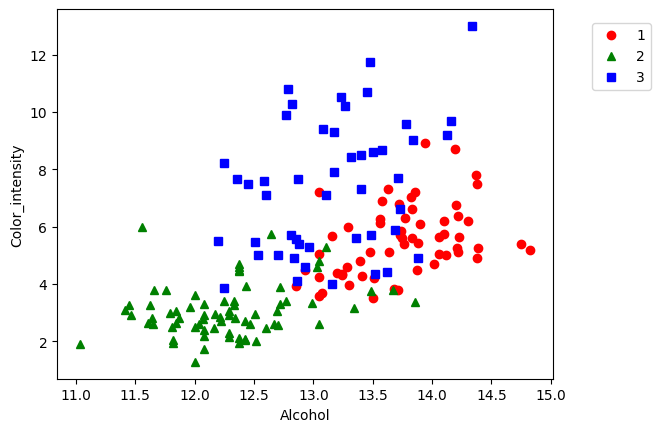

In [12]:
plt.figure(1)
class_1 =plt.plot(Alcohol_1[:59], Color_intensity_10[:59], "ro", label="1")
class_2 = plt.plot(Alcohol_1[59:130], Color_intensity_10[59:130], "g^", label="2")
class_3 = plt.plot(Alcohol_1[130:], Color_intensity_10[130:], "bs", label="3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1.)
plt.xlabel("Alcohol")
plt.ylabel("Color_intensity")

В данном случае взяли две оси, на которых были отложены значения «Alcohol» и «Color_intensity»

Сделаем то же самое, но для других признаков классов

Text(0, 0.5, 'Magnesium')

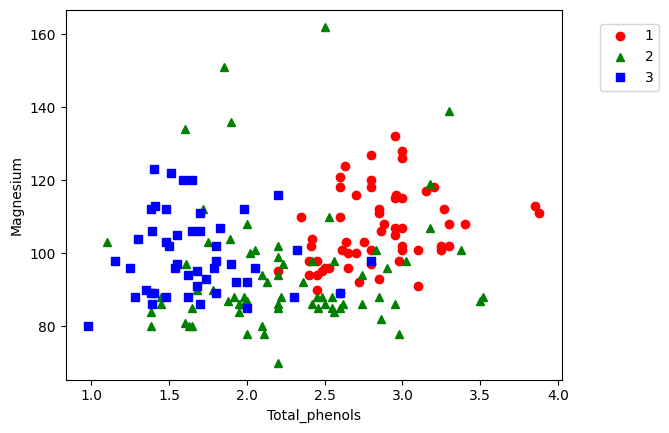

In [13]:
plt.figure(2)
class_1 =plt.plot(Total_phenols_6[:59], Magnesium_5[:59], "ro", label="1")
class_2 = plt.plot(Total_phenols_6[59:130], Magnesium_5[59:130], "g^", label="2")
class_3 = plt.plot(Total_phenols_6[130:], Magnesium_5[130:], "bs", label="3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1.)
plt.xlabel("Total_phenols")
plt.ylabel("Magnesium")

Text(0, 0.5, 'Magnesium')

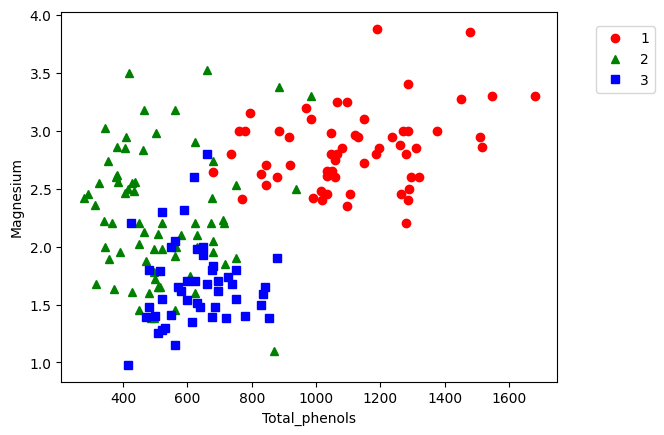

In [15]:
plt.figure(3)
class_1 =plt.plot(proline_13[:59], Total_phenols_6[:59], "ro", label="1")
class_2 = plt.plot(proline_13[59:130], Total_phenols_6[59:130], "g^", label="2")
class_3 = plt.plot(proline_13[130:], Total_phenols_6[130:], "bs", label="3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1.)
plt.xlabel("Total_phenols")
plt.ylabel("Magnesium")

Данный набор данных можно использовать для обучения модели классифицировать вина, по имеющимся характеристикам.
Тип данных числовой, размер 178 на 14, первый столбец – номер класса, последующие – числовые характеристики вина. Пропущенных значений нет.


Контрольные вопросы:

1.	Для организации рабочего места специалиста по Data Science используются следующие средства: Jupyter notebook, VS code, python, numpy, matplotlib и др.
2.	Numpy служит для работы с числовыми данными, матрицами, тензорами
Matplotlib для работы с данными, визуального представления числовых данных
3.	Python получил широкое распространение в машинном обучении. Этот язык обладает определенными характеристиками, которые делают его наилучшим выбором для ML- и ИИ-проектов: он простой и логичный, гибкий и мультиплатформенный, имеет отличные библиотеки и фреймворки для машинного обучения и работы с ИИ, а еще за ним стоит многочисленное сообщество разработчиков. Благодаря всему этому Python является одним из самых популярных языков программирования в мире, причем не только в сфере ML и ИИ.
